In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing = fetch_california_housing()

In [12]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

[[   5.883        52.            6.2160804  ...    2.77386935
    37.82       -122.25      ]
 [   3.8854       17.            5.25554382 ...    2.09820486
    37.04       -122.04      ]
 [   4.2125       16.            5.82025316 ...    3.15189873
    34.96       -120.41      ]
 ...
 [   5.3679       18.            4.50553506 ...    1.87084871
    37.35       -122.02      ]
 [   4.4          45.            5.15625    ...    2.51953125
    33.86       -118.13      ]
 [   3.           24.            4.62614679 ...    2.06422018
    33.92       -117.97      ]]


In [56]:
print(X_train_full.shape)
print(X_train_full[0])


(15480, 8)
[ 5.88300000e+00  5.20000000e+01  6.21608040e+00  1.01256281e+00
  1.10400000e+03  2.77386935e+00  3.78200000e+01 -1.22250000e+02]


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

[[ 0.4092919  -0.36988435  0.30954123 ... -0.10432094 -0.84753734
   0.75222424]
 [-0.02831514 -0.13308929 -0.41080994 ... -0.23867278 -0.72591105
   0.58732085]
 [-1.16530923  0.73515925 -0.78660203 ...  0.16007061 -0.76801245
   0.69225937]
 ...
 [ 0.56645401 -1.15920121 -0.12542155 ...  0.11340476 -1.27322936
   1.20695783]
 [-0.92731792 -0.6856111  -0.63832737 ... -0.01931224 -1.34807631
   1.22694612]
 [ 1.00291083 -0.13308929  0.36010053 ...  0.02188233  0.77102793
  -1.20662814]]


In [57]:
print(X_train_scaled[0])

[ 0.4092919  -0.36988435  0.30954123 -0.07472905  0.13386985 -0.10432094
 -0.84753734  0.75222424]


In [69]:
model = keras.models.Sequential([
keras.layers.Dense(300,name="dense1", activation="relu"),
keras.layers.Dense(100,name="dense2", activation="relu"),
keras.layers.Dense(70,name="dense3", activation="relu"),
keras.layers.Dense(450,name="dense4", activation=keras.layers.LeakyReLU(alpha=0.1)),
keras.layers.Dense(30,name="dense5", activation="relu"),
keras.layers.Dense(1,name="dense6")
])

In [70]:
model1 = keras.models.Sequential([
        keras.layers.Dense(300, name="dense1", activation="relu"),
        keras.layers.Dense(100, name="dense2", activation="relu"),
        keras.layers.Dense(70, name="dense3", activation="relu"),
        keras.layers.Dense(450, name="dense4", activation=keras.layers.LeakyReLU(alpha=0.1)),
        keras.layers.Dense(30, name="dense5", activation="relu"),
        keras.layers.Dense(1, name="dense6")
    ])
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model2 = keras.models.Model(inputs=[input], outputs=[output])

In [63]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=50,validation_data=(X_valid_scaled, y_valid))

Epoch 1/50
363/363 [==============================] - 2s 3ms/step - loss: 0.6520 - val_loss: 0.5171
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3856 - val_loss: 0.3949
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3536 - val_loss: 0.4719
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3379 - val_loss: 0.3775
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3267 - val_loss: 0.5317
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3192 - val_loss: 0.4236
Epoch 7/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3111 - val_loss: 0.3963
Epoch 8/50
363/363 [==============================] - 2s 4ms/step - loss: 0.3059 - val_loss: 0.3786
Epoch 9/50
363/363 [==============================] - 1s 4ms/step - loss: 0.2987 - val_loss: 0.3647
Epoch 10/50
363/363 [==============================] - 1s 3ms/step - loss: 0.2956 - val_loss: 0.3780

In [90]:
# model10 = KerasClassifier(build_fn=model1)

# # Define the parameter grid
# param_grid = {
#     'batch_size': [32, 64],
#     'epochs': [10, 20],
#     'optimizer': ['adam', 'rmsprop']
# }

# # Create the GridSearchCV object
# grid = GridSearchCV(estimator=model10, param_grid=param_grid, cv=3)

# # Fit the grid search on the data
# grid_result = grid.fit(X_train, y_train)

# # Print the best parameters and score
# print("Best parameters: ", grid_result.best_params_)
# print("Best score: ", grid_result.best_score_)

<ipython-input-90-58cab5a78a5a>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model10 = KerasClassifier(build_fn=model1)


AttributeError: ignored

In [66]:
model2.compile(loss="mean_squared_error", optimizer="sgd")
history = model1.fit(X_train_scaled, y_train, epochs=50,validation_data=(X_valid_scaled, y_valid))

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.4280 - val_loss: 2.9902
Epoch 2/50
363/363 [==============================] - 1s 1ms/step - loss: 0.5646 - val_loss: 0.7480
Epoch 3/50
363/363 [==============================] - 1s 1ms/step - loss: 0.7411 - val_loss: 0.8712
Epoch 4/50
363/363 [==============================] - 0s 1ms/step - loss: 0.6169 - val_loss: 1.0921
Epoch 5/50
363/363 [==============================] - 1s 1ms/step - loss: 0.5843 - val_loss: 0.4915
Epoch 6/50
363/363 [==============================] - 1s 1ms/step - loss: 0.4344 - val_loss: 0.8902
Epoch 7/50
363/363 [==============================] - 0s 1ms/step - loss: 0.4137 - val_loss: 0.6293
Epoch 8/50
363/363 [==============================] - 1s 1ms/step - loss: 0.4090 - val_loss: 0.5098
Epoch 9/50
363/363 [==============================] - 1s 1ms/step - loss: 0.4013 - val_loss: 0.4264
Epoch 10/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3592 - val_loss: 0.4115

In [52]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test_scaled[:3]
y_pred = model.predict(X_new)
print(y_test[:3])
print(y_pred)

162/162 [==============================] - 0s 1ms/step - loss: 21626.6973


1/1 [==============================] - 0s 58ms/step
[1.136 2.347 2.561]
[[1.4716773]
 [2.4009714]
 [2.3775475]]


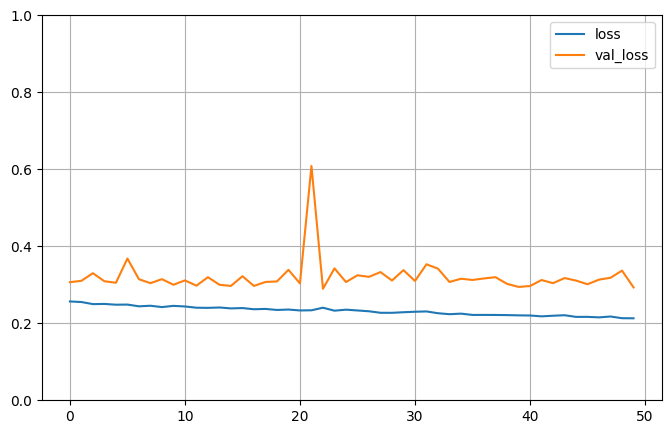

In [53]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()